# Is the climate change real?

<a href='https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data'>source #1: kaggle.com: Climate Change: Earth Surface Temperature Data</a></br>
<a href='https://www.met.hu/en/eghajlat/magyarorszag_eghajlata/eghajlati_adatsorok/'>source #2: Hungarian Meteorological Service: 
Climate Data Series 1901-2020</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the whole first dataset

In [2]:
csv = pd.read_csv("datasets/GlobalLandTemperaturesByCity.csv")
df = pd.DataFrame(csv)

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


### Getting out the Hungarian cities's dataset

In [4]:
df_hun = df[df["Country"] == "Hungary"]

In [5]:
df_hun_city_counts = df_hun.value_counts("City")
df_hun_city_counts

City
Budapest          3239
Debrecen          3239
Gyor              3239
Kecskemét         3239
Miskolc           3239
Nyíregyháza       3239
Pécs              3239
Szeged            3239
Székesfehérvár    3239
Name: count, dtype: int64

In [6]:
hun_cities = df_hun_city_counts.index.tolist()
hun_cities

['Budapest',
 'Debrecen',
 'Gyor',
 'Kecskemét',
 'Miskolc',
 'Nyíregyháza',
 'Pécs',
 'Szeged',
 'Székesfehérvár']

In [7]:
df_hun.isna().sum()

dt                                 0
AverageTemperature               657
AverageTemperatureUncertainty    657
City                               0
Country                            0
Latitude                           0
Longitude                          0
dtype: int64

In [8]:
df_hun.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1173275,1743-11-01,4.920,1.946,Budapest,Hungary,47.42N,20.13E
1173280,1744-04-01,12.224,2.341,Budapest,Hungary,47.42N,20.13E
1173281,1744-05-01,14.523,1.703,Budapest,Hungary,47.42N,20.13E
1173282,1744-06-01,17.735,1.594,Budapest,Hungary,47.42N,20.13E
1173283,1744-07-01,19.978,1.574,Budapest,Hungary,47.42N,20.13E
...,...,...,...,...,...,...,...
7318894,2013-04-01,13.318,0.354,Szeged,Hungary,45.81N,19.62E
7318895,2013-05-01,17.666,0.339,Szeged,Hungary,45.81N,19.62E
7318896,2013-06-01,20.683,0.387,Szeged,Hungary,45.81N,19.62E
7318897,2013-07-01,23.342,0.410,Szeged,Hungary,45.81N,19.62E


### Visualizing all the temperature data for all the cities
- they seem to be more or less paralell

C:\Users\helit\AppData\Local\Temp\ipykernel_30868\2864147402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hun['dt'] = pd.to_datetime(df_hun['dt'])
C:\Users\helit\AppData\Local\Temp\ipykernel_30868\2864147402.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  city_yearly_avg_temp = df_hun.groupby(['City', pd.Grouper(key='dt', freq='Y')])['AverageTemperature'].mean().reset_index()


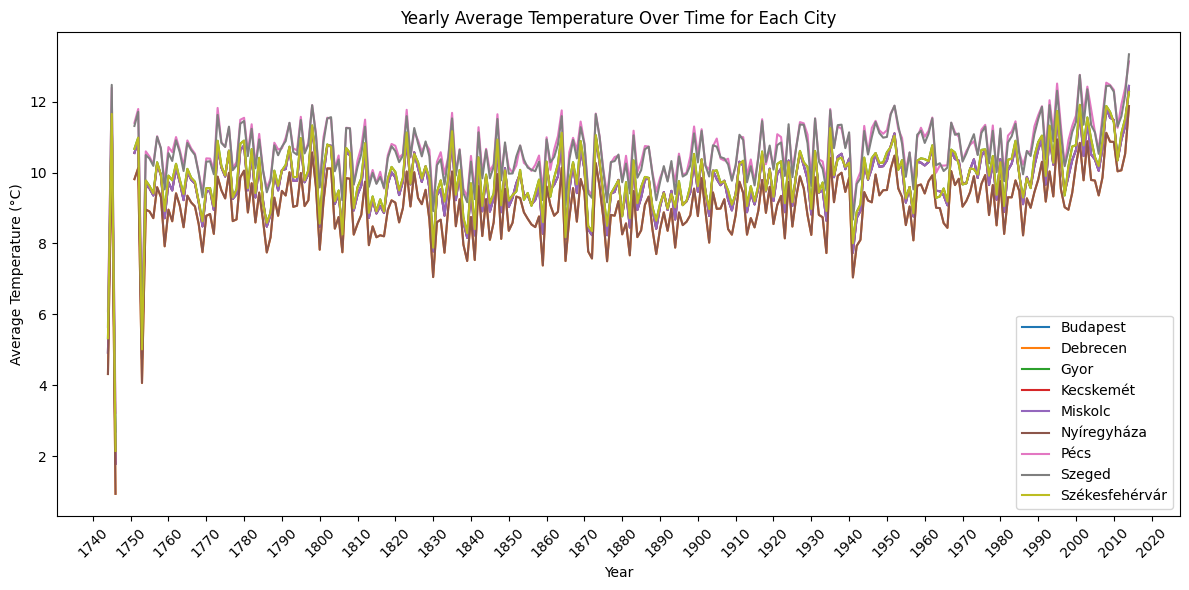

In [9]:
import matplotlib.pyplot as plt

# Convert 'dt' column to datetime format
df_hun['dt'] = pd.to_datetime(df_hun['dt'])

# Group the data by city and resample to calculate yearly mean temperature for each city
city_yearly_avg_temp = df_hun.groupby(['City', pd.Grouper(key='dt', freq='Y')])['AverageTemperature'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
for city in city_yearly_avg_temp['City'].unique():
    city_data = city_yearly_avg_temp[city_yearly_avg_temp['City'] == city]
    plt.plot(city_data['dt'], city_data['AverageTemperature'], label=city)

# Customize x-ticks to show only decades
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=10))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.title('Yearly Average Temperature Over Time for Each City')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### A rising can be seen beginning from the 1970s, so we take a closer look
- the parallelism still visible

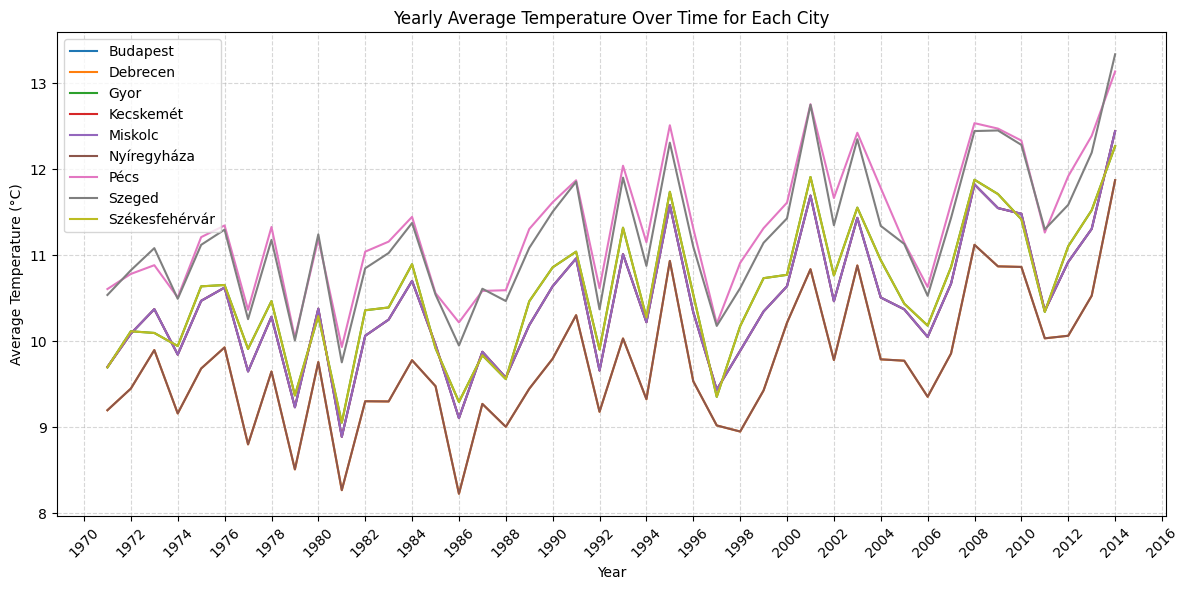

In [10]:
city_yearly_avg_temp = city_yearly_avg_temp[city_yearly_avg_temp['dt'].dt.year >= 1970]

# Plotting
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors

for city in city_yearly_avg_temp['City'].unique():
    city_data = city_yearly_avg_temp[city_yearly_avg_temp['City'] == city]
    plt.plot(city_data['dt'], city_data['AverageTemperature'], label=city)

# Customize x-ticks to show only decades
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.title('Yearly Average Temperature Over Time for Each City')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### They are still paralell if we see the months' averages

C:\Users\helit\AppData\Local\Temp\ipykernel_30868\4002583613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hun['dt'] = pd.to_datetime(df_hun['dt'])


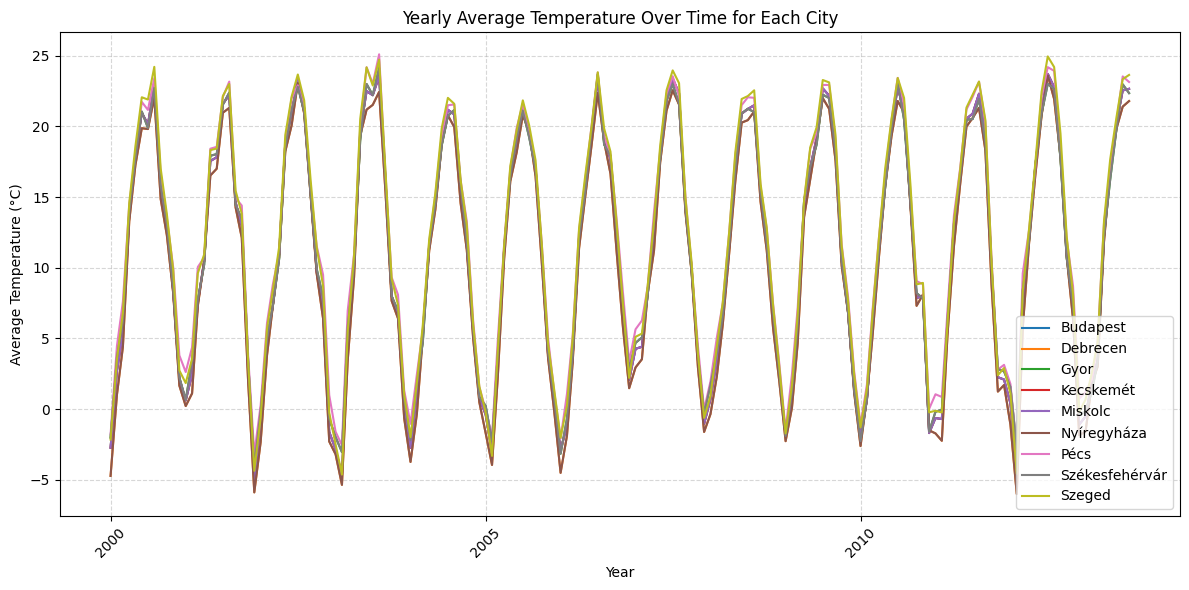

In [11]:
import matplotlib.pyplot as plt

# Convert 'dt' column to datetime format
df_hun['dt'] = pd.to_datetime(df_hun['dt'])

# Filter data from 1970 onwards
df_hun = df_hun[df_hun['dt'].dt.year >= 2000]

# Plotting
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors

for city in df_hun['City'].unique():
    city_data = df_hun[df_hun['City'] == city]
    plt.plot(city_data['dt'], city_data['AverageTemperature'], label=city)

# Customize x-ticks to show only decades
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=5))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.title('Yearly Average Temperature Over Time for Each City')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Since the parallelism is established, we continue the analysis only with Budapest
### The kaggle's dataset is only until 2013, so we implement the dataset with the Hungarian Meteorological Service's dataset

In [12]:
filtered_to_budapest = df[df['City'] == 'Budapest']
budapest_data = filtered_to_budapest[["dt", "AverageTemperature"]].dropna()
budapest_data

,dt,AverageTemperature
1173275,1743-11-01,4.920
1173280,1744-04-01,12.224
1173281,1744-05-01,14.523
1173282,1744-06-01,17.735
1173283,1744-07-01,19.978
...,...,...
1176508,2013-04-01,12.316
1176509,2013-05-01,16.866
1176510,2013-06-01,20.253
1176511,2013-07-01,22.546


In [13]:
# Write the filtered data to a new CSV file
budapest_data.to_csv("datasets/budapest_data.csv", index=False)

In [14]:
bp_data_2 = pd.read_csv("datasets/budapest_data_2.csv")
df_bp_2 = pd.DataFrame(bp_data_2)

In [15]:
bp_concat = pd.concat([budapest_data, df_bp_2], ignore_index=True)
bp_concat

,dt,AverageTemperature
0,1743-11-01,4.920
1,1744-04-01,12.224
2,1744-05-01,14.523
3,1744-06-01,17.735
4,1744-07-01,19.978
...,...,...
3284,2023-08-01,22.510
3285,2023-09-01,20.080
3286,2023-10-01,13.920
3287,2023-11-01,6.160


## The rising beginning from the 1970's is even more visible

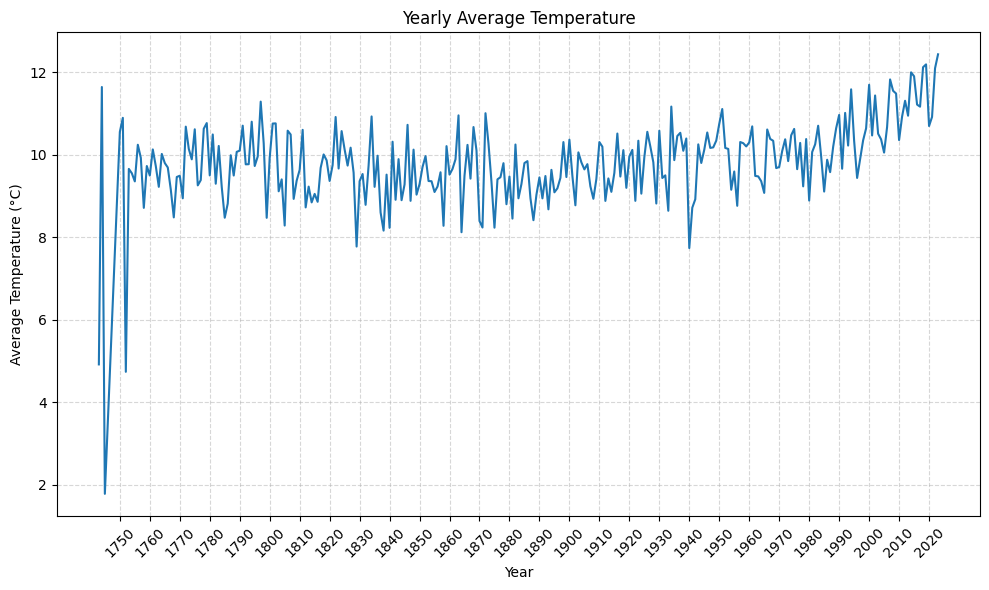

In [16]:
# Convert 'dt' column to datetime format
bp_concat['dt'] = pd.to_datetime(bp_concat['dt'])

# Extract year from 'dt' column
bp_concat['Year'] = bp_concat['dt'].dt.year

# Group by year and calculate the mean temperature for each year
yearly_avg_temp = bp_concat.groupby('Year')['AverageTemperature'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, linestyle='-')
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')

# Extract years divisible by 10 for x-axis ticks
decade_ticks = yearly_avg_temp.index[yearly_avg_temp.index % 10 == 0]

# Set x-axis ticks for every decade
plt.xticks(decade_ticks)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### We have some high and low values, but if the 5-year average is presented, the rising is unequivocal

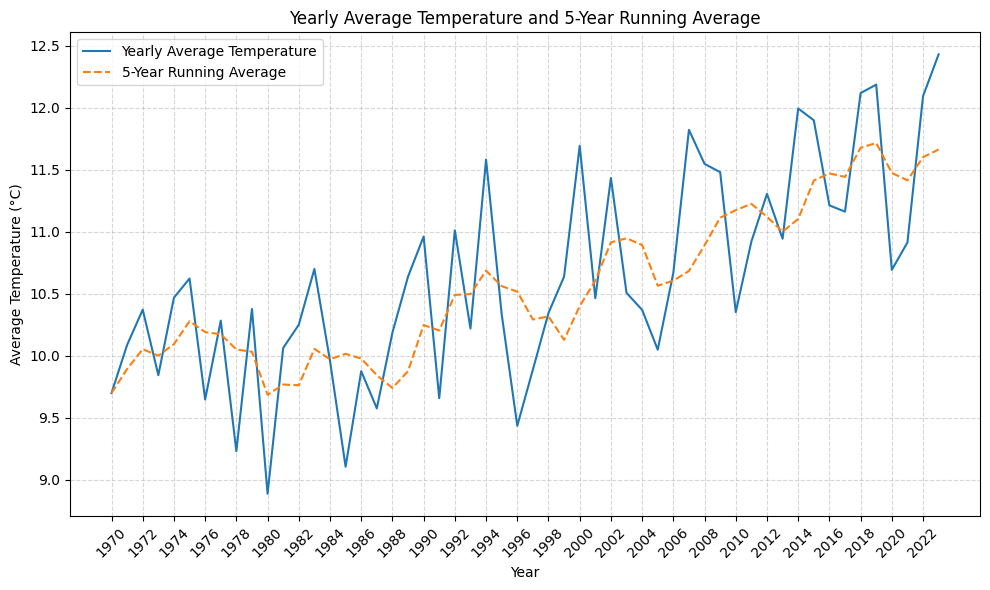

In [17]:
# Filter data from 1970 onwards
yearly_avg_temp = yearly_avg_temp[yearly_avg_temp.index >= 1970]

# Calculate running average with a window size of 5 (adjust as needed)
running_avg = yearly_avg_temp.rolling(window=5, min_periods=1).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, linestyle='-', label='Yearly Average Temperature')
plt.plot(yearly_avg_temp.index, running_avg, linestyle='--', label='5-Year Running Average')
plt.title('Yearly Average Temperature and 5-Year Running Average')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis ticks for every 2 years
plt.xticks(yearly_avg_temp.index[::2])

plt.legend()
plt.tight_layout()
plt.show()

# Analysis of given month's average temperatures
### People like to say that seasons' position have moved, but it's that true?

# Analysis of extreme precipitations
### People also like to say that we didn't used to have single rainstorms with that much amount of precipitation, is that true? I analyze it in 5 different cities

In [18]:
csv_prec = pd.read_csv("datasets/daily/BP_d.txt", sep=";")
df_prec = pd.DataFrame(csv_prec[["#datum", "d_rs"]])

In [19]:
df_prec.rename(columns={'#datum': 'date', 'd_rs': 'BP'}, inplace=True)

In [20]:
df_prec.head()

,date,BP
0,1901-01-01,1.9
1,1901-01-02,0.0
2,1901-01-03,0.8
3,1901-01-04,0.2
4,1901-01-05,0.0


In [21]:
other_datafiles = ["datasets/daily/DE_d.txt",
                   "datasets/daily/PE_d.txt",
                   "datasets/daily/SZE_d.txt",
                   "datasets/daily/SZO_d.txt"]

In [22]:
for i in other_datafiles:
    csv_prec_i = pd.read_csv(i, sep=";")
    df_prec_i = pd.DataFrame(csv_prec_i["d_rs"])
    new_column_name = i[-9:-6]

    if "/" in new_column_name:
        new_column_name = new_column_name.replace('/', '')
    else:
        pass

    new_column = df_prec_i.rename(columns={'d_rs': new_column_name})
    df_prec[new_column_name] = new_column

In [23]:
df_prec.head()

,date,BP,DE,PE,SZE,SZO
0,1901-01-01,1.9,2.2,4.6,3.5,0.9
1,1901-01-02,0.0,3.0,0.5,0.4,0.0
2,1901-01-03,0.8,0.0,0.4,0.4,2.0
3,1901-01-04,0.2,0.0,0.0,0.3,2.2
4,1901-01-05,0.0,0.0,2.0,0.6,1.0


## Calculating the average amount of precipitation of the rainy days for each year

In [28]:
df_prec['date'] = pd.to_datetime(df_prec['date'])
df_prec['year'] = df_prec['date'].dt.year

# Filter the dataframe to include only rows where any precipitation occurred
precipitation_days = df_prec[df_prec[['BP', 'DE', 'PE', 'SZE', 'SZO']].gt(0).any(axis=1)]

# Group by year and calculate the average precipitation for each year
average_precipitation_yearly = precipitation_days.groupby('year')[['BP', 'DE', 'PE', 'SZE', 'SZO']].mean().mean(axis=1)

# Print the average precipitation for each year
print("Average quantity of precipitation on days when there was any, for each year:")
print(average_precipitation_yearly)


Average quantity of precipitation on days when there was any, for each year:
year
1901    2.872837
1902    2.960705
1903    2.716807
1904    2.714286
1905    2.690083
          ...   
2016    3.085929
2017    2.725421
2018    2.389705
2019    2.572760
2020    2.433480
Length: 120, dtype: float64


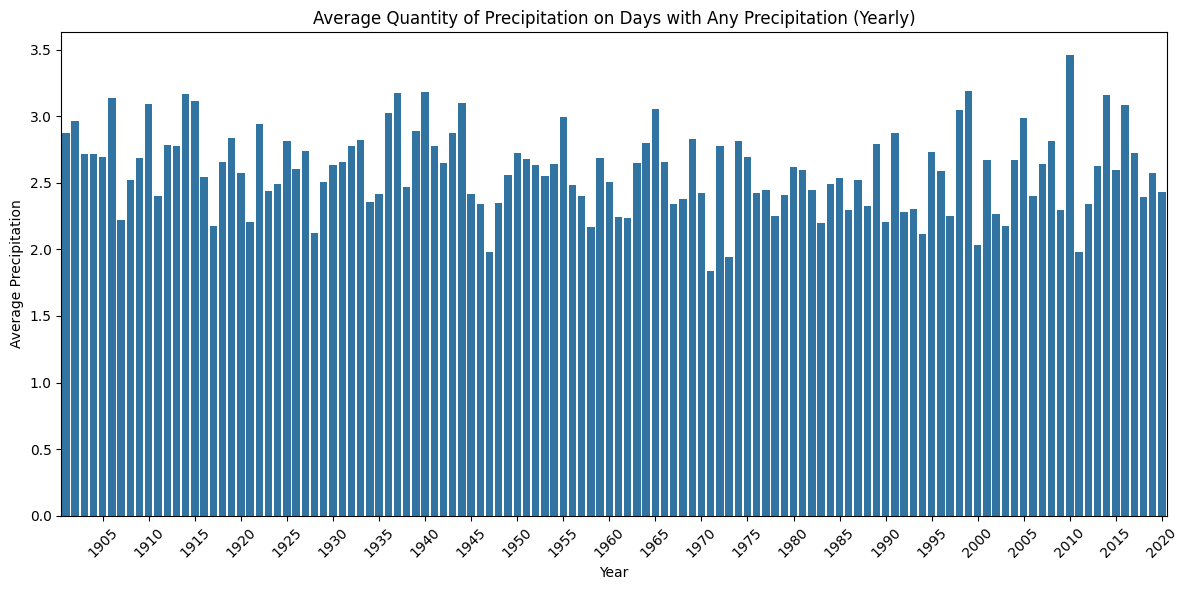

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=average_precipitation_yearly)

plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Quantity of Precipitation on Days with Any Precipitation (Yearly)')

plt.xticks(rotation=45)
plt.xticks(plt.xticks()[0][4::5])

plt.tight_layout()
plt.show()

## Calculating the number of days with precipitation

In [38]:
rainy_days_yearly = df_prec[df_prec[['BP', 'DE', 'PE', 'SZE', 'SZO']].gt(0).any(axis=1)].groupby('year').size()

print("Number of rainy days for each year:")
print(rainy_days_yearly)

Number of rainy days for each year:
year
1901    215
1902    227
1903    238
1904    217
1905    240
       ... 
2016    226
2017    214
2018    237
2019    221
2020    227
Length: 120, dtype: int64


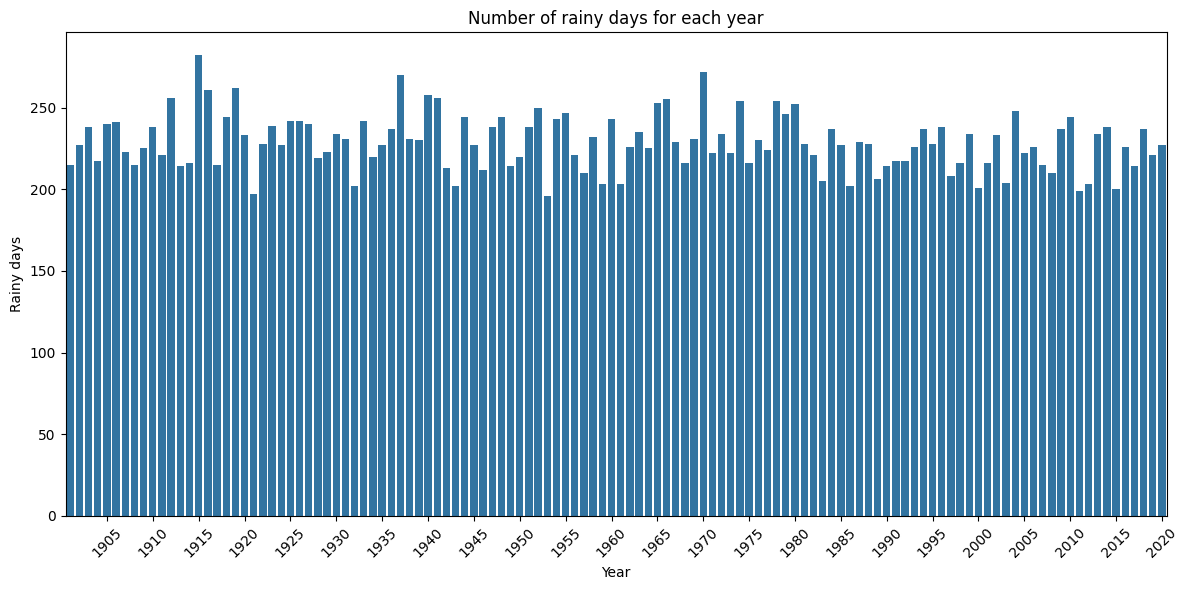

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rainy_days_yearly)

plt.xlabel('Year')
plt.ylabel('Rainy days')
plt.title('Number of rainy days for each year')

plt.xticks(rotation=45)
plt.xticks(plt.xticks()[0][4::5])

plt.tight_layout()
plt.show()

## Maximum amount of precipitation for each year

In [41]:
max_precipitation_yearly = df_prec.groupby('year')[['BP', 'DE', 'PE', 'SZE', 'SZO']].max().max(axis=1)

print("Amount of maximum precipitation for each year:")
print(max_precipitation_yearly)

Amount of maximum precipitation for each year:
year
1901    38.8
1902    48.7
1903    40.2
1904    62.0
1905    34.3
        ... 
2016    59.3
2017    56.5
2018    59.8
2019    49.3
2020    54.7
Length: 120, dtype: float64


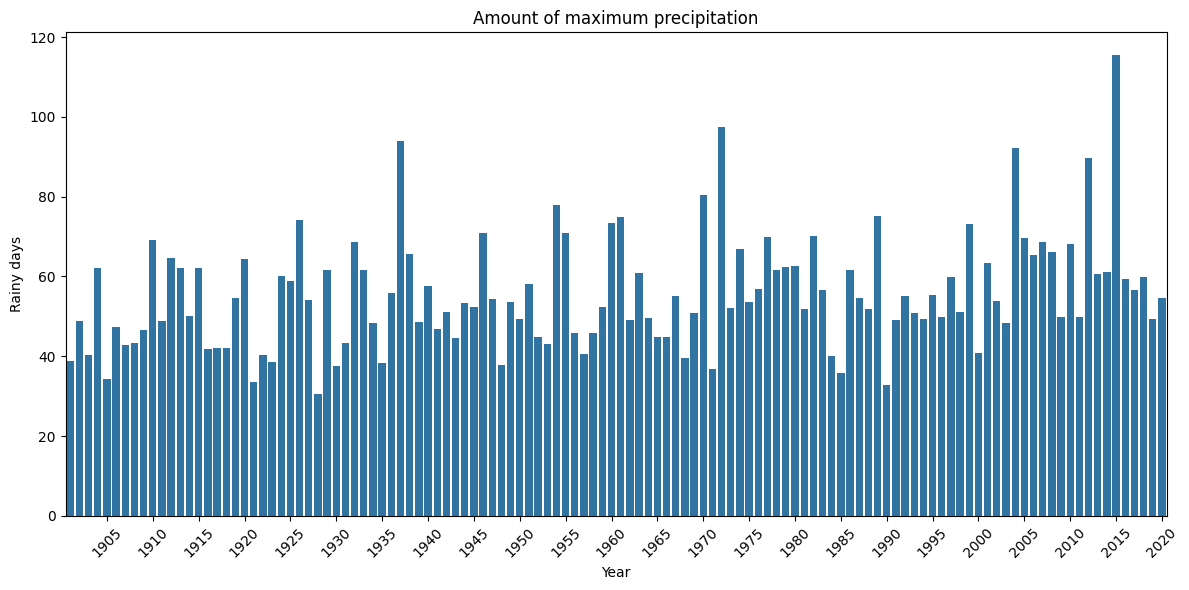

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=max_precipitation_yearly)

plt.xlabel('Year')
plt.ylabel('Rainy days')
plt.title('Amount of maximum precipitation')

plt.xticks(rotation=45)
plt.xticks(plt.xticks()[0][4::5])

plt.tight_layout()
plt.show()